In [3]:
import os

def report_dir(path: str):
    """Print whether *path* exists and (if yes) list its contents."""
    exists = os.path.exists(path)
    print(f"{path} exists: {exists}")
    if exists:
        print(f"Files in {path}: {os.listdir(path) or '[empty]'}")
    print()

report_dir("./data_normalized")
report_dir("./data_raw")

./data_normalized exists: True
Files in ./data_normalized: ['norm_book_btc_usdt_20250215_20250228.parquet', 'norm_book_btc_usdt_20241115_20241130.parquet', 'norm_book_btc_usdt_20250201_20250215.parquet', 'norm_book_btc_usdt_20241101_20241115.parquet', 'norm_book_btc_usdt_20240915_20240930.parquet', 'norm_book_btc_usdt_20250115_20250131.parquet', 'norm_book_btc_usdt_20241015_20241031.parquet', 'norm_book_btc_usdt_20241201_20241215.parquet', 'norm_book_btc_usdt_20241001_20241015.parquet', 'norm_book_btc_usdt_20250101_20250115.parquet', 'norm_book_btc_usdt_20240901_20240915.parquet', 'norm_book_btc_usdt_20250301_20250305.parquet', 'norm_book_btc_usdt_20250305_20250310.parquet', 'norm_book_btc_usdt_20241215_20241231.parquet']

./data_raw exists: True
Files in ./data_raw: ['book_btc_usdt_20250201_20250215.parquet', 'book_btc_usdt_20241201_20241215.parquet', 'book_btc_usdt_20250215_20250228.parquet', 'book_btc_usdt_20240101_20240115.parquet', 'book_btc_usdt_20241101_20241115.parquet', 'book_

### Download raw and normalized LOB data for prediction.

In [ ]:
# 📦 one-time install (does nothing if gdown is already installed)
!pip install -q gdown

import gdown, pathlib, os

# ---------------------------------------------------------------------------
# RAW LOB  (20-level, 6 Hz)
# ---------------------------------------------------------------------------
raw_url   = "https://drive.google.com/file/d/1PDzhgYNHmekLSUsYIw4YWebEW2gaVeV0/view?usp=sharing"
raw_path  = pathlib.Path("data_raw/book_btc_usdt_20250305_20250310.parquet")
raw_path.parent.mkdir(exist_ok=True)

if raw_path.exists() and raw_path.stat().st_size > 0:
    print(f"✔️  {raw_path.name} already exists – download skipped.")
else:
    print(f"⬇️  downloading RAW → {raw_path} …")
    gdown.download(url=raw_url, output=str(raw_path), quiet=False, fuzzy=True)
    print("✅ download finished." if raw_path.stat().st_size else "⚠️ download failed.")

# ---------------------------------------------------------------------------
# NORMALISED LOB  (10-level, z-scored)  – add your own Drive link below
# ---------------------------------------------------------------------------
norm_url  = "https://drive.google.com/file/d/1mC0EEoo5neMkAly5cnzaxo0S-S6lfsUz/view?usp=sharing"  # <-- put the share link here
norm_path = pathlib.Path("data_normalized/norm_book_btc_usdt_20250305_20250310.parquet")
norm_path.parent.mkdir(exist_ok=True)

if norm_path.exists() and norm_path.stat().st_size > 0:
    print(f"✔️  {norm_path.name} already exists – download skipped.")
else:
    print(f"⬇️  downloading NORMALISED → {norm_path} …")
    gdown.download(url=norm_url, output=str(norm_path), quiet=False, fuzzy=True)
    print("✅ download finished." if norm_path.stat().st_size else "⚠️ download failed.")

⬇️  downloading RAW → data_raw/book_btc_usdt_20250305_202503101.parquet …


Downloading...
From (original): https://drive.google.com/uc?id=1PDzhgYNHmekLSUsYIw4YWebEW2gaVeV0
From (redirected): https://drive.google.com/uc?id=1PDzhgYNHmekLSUsYIw4YWebEW2gaVeV0&confirm=t&uuid=a148a6b4-8e6e-41b7-ba89-a957aa7f0201
To: /home/andras/btc-project/szakdolgozat-high-freq-btc-prediction/data_raw/book_btc_usdt_20250305_202503101.parquet
100%|██████████| 487M/487M [02:29<00:00, 3.26MB/s] 


✅ download finished.
⬇️  downloading NORMALISED → data_normalized/norm_book_btc_usdt_20250305_202503101.parquet …


Downloading...
From (original): https://drive.google.com/uc?id=1mC0EEoo5neMkAly5cnzaxo0S-S6lfsUz
From (redirected): https://drive.google.com/uc?id=1mC0EEoo5neMkAly5cnzaxo0S-S6lfsUz&confirm=t&uuid=086c036b-c81f-4dd3-aeb2-c141903881f0
To: /home/andras/btc-project/szakdolgozat-high-freq-btc-prediction/data_normalized/norm_book_btc_usdt_20250305_202503101.parquet
100%|██████████| 439M/439M [02:45<00:00, 2.65MB/s] 

✅ download finished.


Using cuda
GPU: NVIDIA RTX A500 Laptop GPU
Memory total: 4.29 GB
Using cuda
GPU: NVIDIA RTX A500 Laptop GPU
Memory total: 4.29 GB

=== DeepLOB Model Validation ===
Time period: 2025-03-05 to 2025-03-10
Symbol: BTC-USDT
Model: ./models/deeplob_single_parallel_f1_0.4369.pt
Finding normalized data for BTC-USDT from 2025-03-05 00:00:00 to 2025-03-10 00:00:00...
Found 2 normalized files:
  norm_book_btc_usdt_20250301_20250305.parquet: 2025-03-05 00:00:00 to 2025-03-05 00:00:00
  norm_book_btc_usdt_20250305_20250310.parquet: 2025-03-05 00:00:00 to 2025-03-10 00:00:00
Found 2 files for processing
File information loaded in 0.01s
Initializing model from ./models/deeplob_single_parallel_f1_0.4369.pt...


/home/andras/miniconda3/envs/rapids-25.02/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


Biztonságos betöltés sikertelen, teljes objektum betöltése: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL numpy._core.multiarray.scalar was not an allowed global by default. Please use `torch.serialization.add_safe_globals([scalar])` or the `torch.serialization.safe_globals([scalar])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about 

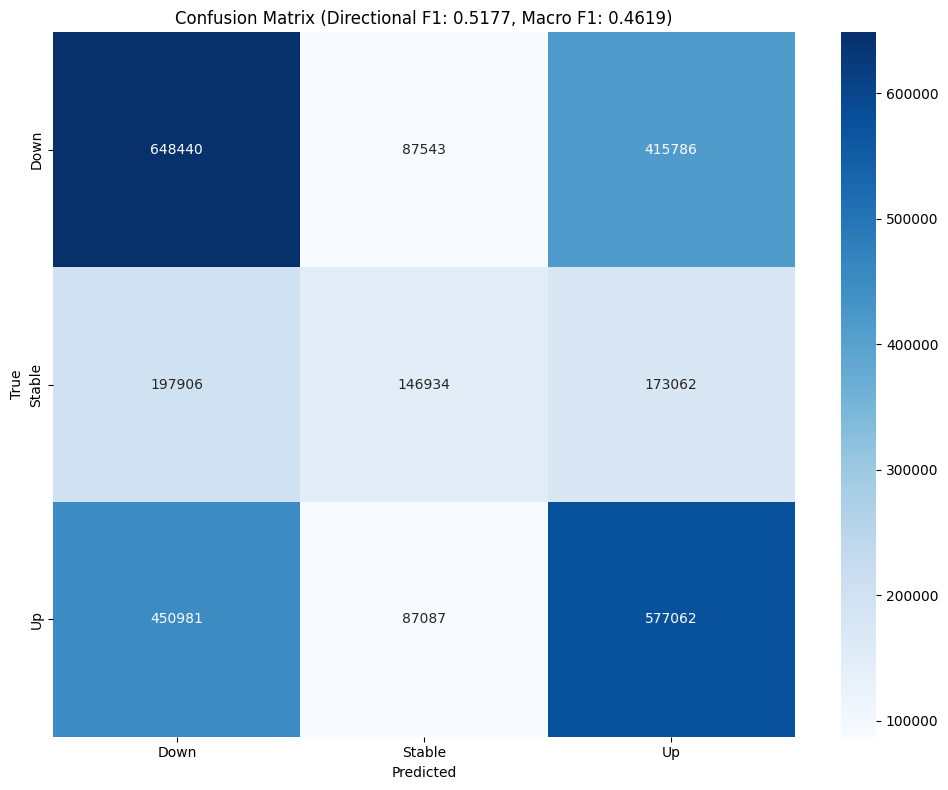

Saved detailed report to 'szakdolgozat-high-freq-btc-prediction/results/deeplob/validation_report_deeplob_single_parallel_f1_0_20250610_184204.txt'

Checking metrics for parquet file creation...
Available keys in metrics: ['raw_predictions', 'timestamps', 'normalized_prices', 'raw_prices', 'directional_f1', 'macro_f1', 'class_f1', 'f1_per_class', 'precision', 'recall', 'conf_matrix', 'class_counts', 'class_distribution', 'report', 'test_loss', 'all_true', 'all_pred']
Found required data for parquet file:
- Timestamps shape: 2784801
- Normalized prices shape: 2784801
- Raw prices shape: 2784801
- Predictions shape: 2784801
Saved predictions to 'szakdolgozat-high-freq-btc-prediction/results/deeplob/predictions_deeplob_single_parallel_f1_0_20250305_20250310.parquet'

Validation completed successfully.
Confusion matrix saved to 'szakdolgozat-high-freq-btc-prediction/results/deeplob/validation_conf_matrix_deeplob_single_parallel_f1_0_20250610_184204.png'
Detailed report saved to 'szakdolgoz

({'raw_predictions': array([2, 0, 2, ..., 2, 0, 2]),
  'timestamps': array(['2025-03-05T00:00:00.980656640', '2025-03-05T00:00:02.609354496',
         '2025-03-05T00:00:02.855649024', ...,
         '2025-03-09T23:59:27.216521472', '2025-03-09T23:59:27.316617984',
         '2025-03-09T23:59:27.416447488'], dtype='datetime64[ns]'),
  'normalized_prices': array([-0.0531236 , -0.0531236 , -0.06114735, ..., -2.9539785 ,
         -2.9539785 , -2.9539785 ], dtype=float32),
  'raw_prices': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  'directional_f1': np.float64(0.5177490545397918),
  'macro_f1': 0.46185450259911326,
  'class_f1': array([0.52953416, 0.3500654 , 0.50596395]),
  'f1_per_class': array([0.5295341 , 0.35006538, 0.5059639 ], dtype=float32),
  'precision': array([0.4998277 , 0.45693547, 0.4949456 ], dtype=float32),
  'recall': array([0.56299484, 0.28371003, 0.51748407], dtype=float32),
  'conf_matrix': array([[648440,  87543, 415786],
         [197906, 146934, 173062],
    

In [1]:
from IV_validation import validate_model

# A fájlban megadott alapértelmezett útvonal helyett megadjuk a helyes útvonalat
validate_model(
    start_date="2025-03-05",
    end_date="2025-03-10",
    model_path="./models/deeplob_single_parallel_f1_0.4369.pt",
    data_dir="./data_normalized"  # Itt megadod a helyes, relatív útvonalat
)

# Trading strategy & visualization

In [ ]:
import os

# A trading_strategy_visualization modul importálása
from V_trading_strategy_visualization import load_and_visualize_strategy

# Debug mode parameters - ezeket tetszőlegesen módosíthatod
start_date = "20250305"  # Módosítható paraméter
end_date = "20250310"    # Módosítható paraméter
signal_threshold = 3     # Módosítható paraméter: hány egymás utáni jelzés szükséges a kereskedéshez

# Relatív elérési út használata
predictions_file = f"./results/deeplob/predictions_deeplob_single_parallel_f1_0_{start_date}_{end_date}.parquet"
print(f"Using prediction file: {predictions_file}")
print(f"Signal threshold: {signal_threshold}")

# Automatikus mentés HTML formátumban
output_dir = "./results/visualizations"
os.makedirs(output_dir, exist_ok=True)

# HTML mentés (interaktív)
html_path = os.path.join(output_dir, f"trading_strategy_signal{signal_threshold}_{start_date}_{end_date}.html")

# Stratégia betöltése és vizualizálása mintavételezett kereskedésekkel
fig = load_and_visualize_strategy(
    predictions_file="./results/deeplob/predictions_deeplob_single_parallel_f1_0_20250305_20250310.parquet",
    signal_threshold=3,
    save_path="./results/visualizations/trading_strategy.html",
    max_trades=10000  # Maximálisan megjelenítendő kereskedések száma
)

Using prediction file: ./results/deeplob/predictions_deeplob_single_parallel_f1_0_20250305_20250310.parquet
Signal threshold: 3
Loading predictions from ./results/deeplob/predictions_deeplob_single_parallel_f1_0_20250305_20250310.parquet
Loaded data shape: (2784801, 4)
Time range: 2025-03-05 00:00:00.980656640 - 2025-03-09 23:59:27.416447488
Preprocessing data...
Data preprocessing complete.
Generating trades with signal threshold: 3...
Generated 96066 trades

Trading Strategy Results:
Total trades: 96066
Winning trades: 27922 (29.07%)
Total return: 10.26%
Average return per trade: 0.00%
Average trade duration: 3.03 seconds
Median trade duration: 2.10 seconds
Sharpe ratio: 7.43
Maximum drawdown: -8.19%
Buy and Hold Return: -7.59%
Strategy Outperformance: 17.84%
Összes kereskedés száma: 96066
Mintavételezés 10000 kereskedésre az egyenletes megjelenítés érdekében...
Mintavételezett kereskedések száma: 10674
Előkészítési idő: 0.00s
A teljes hozam az összes kereskedésre: 10.54%
Interaktív 